In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

In [25]:
df = pd.read_csv('SMSSpamCollection', sep = '\t')

In [26]:
df.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [27]:
df.keys()

Index(['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'], dtype='object')

In [28]:
classes = df['ham']
print(classes.value_counts())

ham     4824
spam     747
Name: ham, dtype: int64


In [29]:
df['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']

0                           Ok lar... Joking wif u oni...
1       Free entry in 2 a wkly comp to win FA Cup fina...
2       U dun say so early hor... U c already then say...
3       Nah I don't think he goes to usf, he lives aro...
4       FreeMsg Hey there darling it's been 3 week's n...
                              ...                        
5566    This is the 2nd time we have tried 2 contact u...
5567                 Will ü b going to esplanade fr home?
5568    Pity, * was in mood for that. So...any other s...
5569    The guy did some bitching but I acted like i'd...
5570                           Rofl. Its true to its name
Name: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..., Length: 5571, dtype: object

In [30]:
spam = df[df['ham']=='spam']
spam

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,spam,FreeMsg Hey there darling it's been 3 week's n...
7,spam,WINNER!! As a valued network customer you have...
8,spam,Had your mobile 11 months or more? U R entitle...
10,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5536,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5539,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5546,spam,Had your contract mobile 11 Mnths? Latest Moto...
5565,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [31]:
ham = df[df['ham']=='ham']
ham

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
5,ham,Even my brother is not like to speak with me. ...
6,ham,As per your request 'Melle Melle (Oru Minnamin...
...,...,...
5564,ham,Huh y lei...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


C:\Users\rondi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


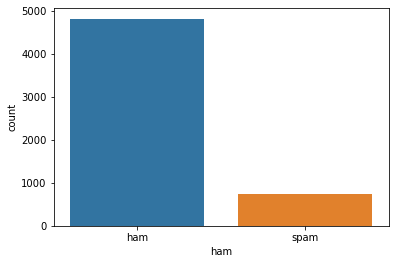

In [32]:
sns.countplot(df['ham'], label = 'Count');

## Pré-processamento de dados

In [33]:
from sklearn.preprocessing import LabelEncoder

# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

print(Y[:10])

[0 1 0 0 1 0 0 1 1 0]


In [34]:
# store the SMS message data
text_messages = df['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
print(text_messages[:10])

0                        Ok lar... Joking wif u oni...
1    Free entry in 2 a wkly comp to win FA Cup fina...
2    U dun say so early hor... U c already then say...
3    Nah I don't think he goes to usf, he lives aro...
4    FreeMsg Hey there darling it's been 3 week's n...
5    Even my brother is not like to speak with me. ...
6    As per your request 'Melle Melle (Oru Minnamin...
7    WINNER!! As a valued network customer you have...
8    Had your mobile 11 months or more? U R entitle...
9    I'm gonna be home soon and i don't want to tal...
Name: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..., dtype: object


## Expressões regulares

In [35]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [36]:
# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [37]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()
print(processed)

0                                 ok lar joking wif u oni
1       free entry in numbr a wkly comp to win fa cup ...
2             u dun say so early hor u c already then say
3       nah i don t think he goes to usf he lives arou...
4       freemsg hey there darling it s been numbr week...
                              ...                        
5566    this is the numbrnd time we have tried numbr c...
5567                  will ü b going to esplanade fr home
5568    pity was in mood for that so any other suggest...
5569    the guy did some bitching but i acted like i d...
5570                            rofl its true to its name
Name: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..., Length: 5571, dtype: object


In [38]:
from nltk.corpus import stopwords
import nltk
nltk.download()

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [39]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [40]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [41]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 6577
Most common words: [('numbr', 2648), ('u', 1207), ('call', 674), ('go', 455), ('get', 451), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 304), ('moneysymbnumbr', 303), ('ok', 293), ('free', 284), ('day', 276), ('know', 275), ('love', 266)]


In [42]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [44]:
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

ok
lar
joke
wif
u
oni


In [45]:
# Now lets do it for all the messages
messages = list(zip(processed, Y))

# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

In [46]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [47]:
print(len(training))
print(len(testing))

4178
1393


In [48]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 98.34888729361091
